In [4]:
from pornhub_api import PornhubApi
import networkx as nx
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from time_conv import *
from graph import PornGraph
from pyvis.network import Network
from collections import Counter
import seaborn as sns
sns.set_theme()

graph = PornGraph()
graph.from_csv('merged.csv')

### cliques


<AxesSubplot:xlabel='wielkość kliki', ylabel='liczba wystąpień'>

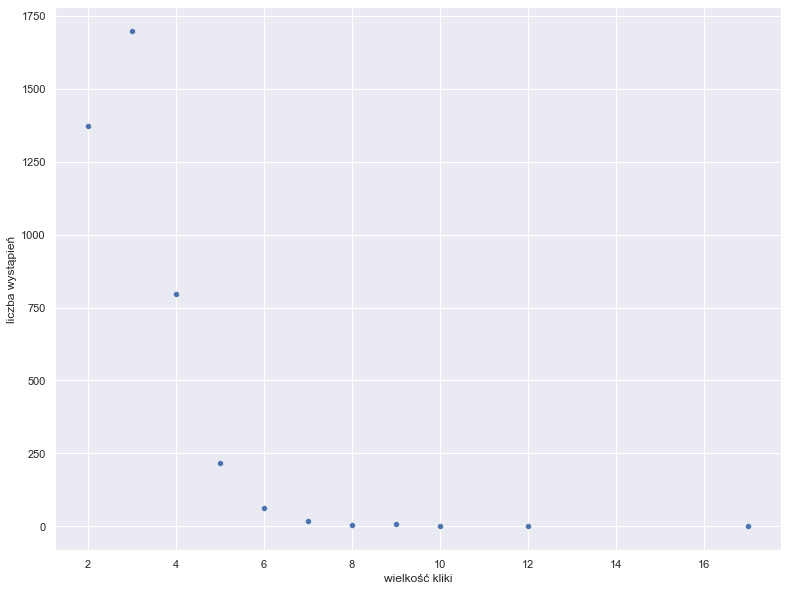

In [5]:
list_of_cliques = [len(x) for x in graph.biggest_clique()]

data = Counter(list_of_cliques)
data = pd.DataFrame(list(zip(data.keys(), data.values())), columns=['wielkość kliki', 'liczba wystąpień'])
plt.figure(figsize=(13,10))
sns.scatterplot(data, x='wielkość kliki',y='liczba wystąpień')

## diameter and density

In [6]:
print('średnica', graph.diameter)
print('gęstość', graph.density)

średnica 12
gęstość 0.0035939523621825553


# videos count

count    16176.000000
mean        10.200729
std         11.651713
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         49.000000
Name: videos_made, dtype: float64

<AxesSubplot:xlabel='videos_made', ylabel='Count'>

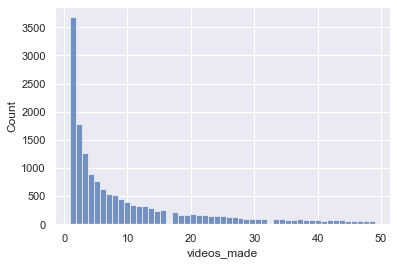

In [19]:
df = pd.read_csv('stars.csv',index_col=0,header=0, names=['star_name','url','videos_made'])
df = df[df.videos_made > 0] # stars without movies doesn't have any value to our analyst
display(df.videos_made.describe())

df = df[df.videos_made < 50]
sns.histplot(data=df, x='videos_made')